<a href="https://colab.research.google.com/github/BhanuDanda/AIML-/blob/main/lab%20exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction of dresses in garment sales
1. Identify the top 5 material most used for garment making?
2. Identify the seasons with most garment usage
3. Find the max and min size of garments made for customers.
4. Name the top 5 decoration, fabrictype used to make garments
5. Identify the costliest stylish garment prepared for customers.
6. Apply either Classification Model or Clustering Model to evaluate the dataset

1. Identify the top 5 material most used for garment making?

In [14]:
import pandas as pd

data = pd.read_csv('garment_sales.csv')

print("Top 5 materials used for garment making:")
print(data['Material'].value_counts().head(5))


Top 5 materials used for garment making:
Material
Cotton       3
Polyester    2
Silk         2
Linen        2
Wool         2
Name: count, dtype: int64


2. Identify the seasons with most garment usage

In [15]:
print("\nSeasons with most garment usage:")
print(data['Season'].value_counts())



Seasons with most garment usage:
Season
Summer    5
Winter    4
Spring    3
Autumn    3
Name: count, dtype: int64


3. Find the max and min size of garments made for customers.

In [16]:
print("\nMaximum size of garments:", data['Size'].max())
print("Minimum size of garments:", data['Size'].min())



Maximum size of garments: 46
Minimum size of garments: 34


4. Name the top 5 decoration, fabrictype used to make garments

In [17]:
print("\nTop 5 decorations used:")
print(data['Decoration'].value_counts().head(5))

print("\nTop 5 fabric types used:")
print(data['FabricType'].value_counts().head(5))



Top 5 decorations used:
Decoration
Embroidery    4
Beading       3
Sequins       3
Lace          3
Patchwork     2
Name: count, dtype: int64

Top 5 fabric types used:
FabricType
Chiffon    3
Denim      2
Satin      2
Linen      2
Cotton     2
Name: count, dtype: int64


5. Identify the costliest stylish garment prepared for customers.

In [18]:
most_expensive_garment = data.loc[data['Cost'].idxmax()]
print("\nCostliest stylish garment details:")
print(most_expensive_garment)



Costliest stylish garment details:
Material       Velvet
Season         Winter
Size               46
Decoration    Sequins
FabricType     Velvet
Style          Formal
Cost             3000
Name: 9, dtype: object


6. Apply either Classification Model or Clustering Model to evaluate the dataset

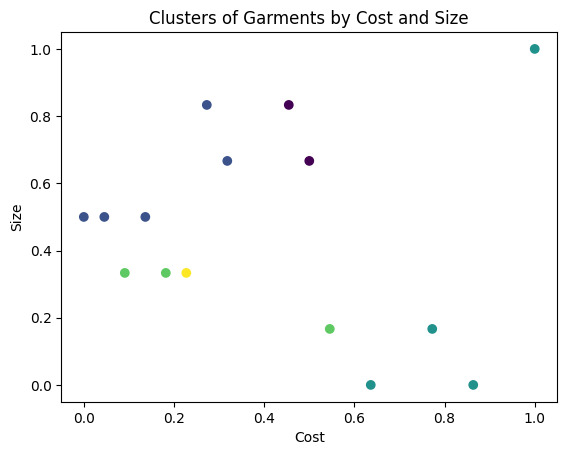


Processed dataset with cluster labels saved as 'processed_garment_sales.csv'.


In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt

categorical_columns = ['Material', 'Season', 'Decoration', 'FabricType', 'Style']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

scaler = MinMaxScaler()
data[['Size', 'Cost']] = scaler.fit_transform(data[['Size', 'Cost']])


features = ['Material', 'Season', 'Size', 'Decoration', 'FabricType', 'Style', 'Cost']
X = data[features]

kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

plt.scatter(data['Cost'], data['Size'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Cost')
plt.ylabel('Size')
plt.title('Clusters of Garments by Cost and Size')
plt.show()

data.to_csv('processed_garment_sales.csv', index=False)
print("\nProcessed dataset with cluster labels saved as 'processed_garment_sales.csv'.")
